Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization if to change the values of numeric columns in the dataset to use a common scale, without distorting difference in the ranges of values or losing information

# 1. Min-Max Normalization (Scaling)

**Purpose**: Scales data to a fixed range, typically [0, 1].

**Formula**:
<pre>
            𝑋i − 𝑋𝑚𝑖𝑛
𝑋i =       ------------
            𝑋𝑚𝑎𝑥 − 𝑋𝑚𝑖𝑛
</pre>

# 2. Standardization (Z-score Normalization)

**Purpose**: Transforms the data to have a mean of 0 and a standard deviation of 1.

**Formula**:
<pre>
        𝑋i − 𝜇
𝑋i =   -------
         σ
</pre> 
       
 

<li>Where 𝜇 is the mean and 𝜎 is the standard deviation.

# 3. Robust Scaling

**Purpose**: Scales the data using statistics that are robust to outliers, specifically using the median and the interquartile range (IQR).

**Formula**:

<pre>
               𝑋i − median
    𝑋i =     -------------
                 IQR
</pre>
Where IQR is the interquartile range (75th percentile - 25th percentile).

# 4. MaxAbs Scaling

**Purpose**: Scales each feature by its maximum absolute value, preserving sparsity and making the range [-1, 1].

**Formula**:
<pre>
                𝑋i
𝑋i =        ----------
             ∣ 𝑋𝑚𝑎𝑥 |
</pre>
 

<li>Where 𝑋𝑚𝑎𝑥 is the maximum absolute value in the feature.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class Labels', 'Alcohol', 'Malic acid']


In [3]:
df.head()

,Class Labels,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

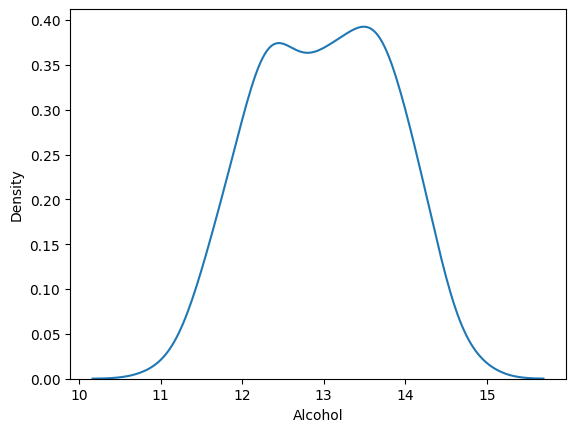

In [4]:
sns.kdeplot(x='Alcohol', data=df)

<Axes: xlabel='Malic acid', ylabel='Density'>

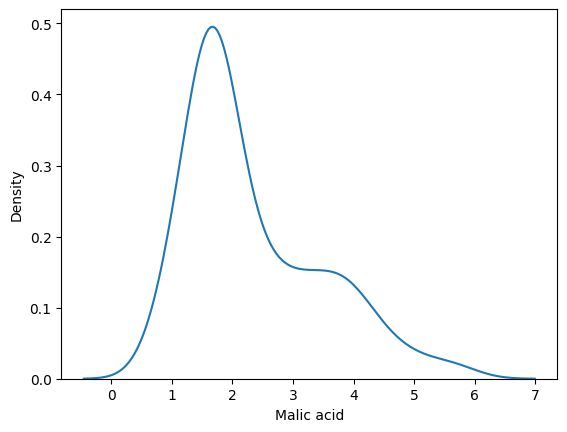

In [5]:
sns.kdeplot(x='Malic acid', data=df)

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

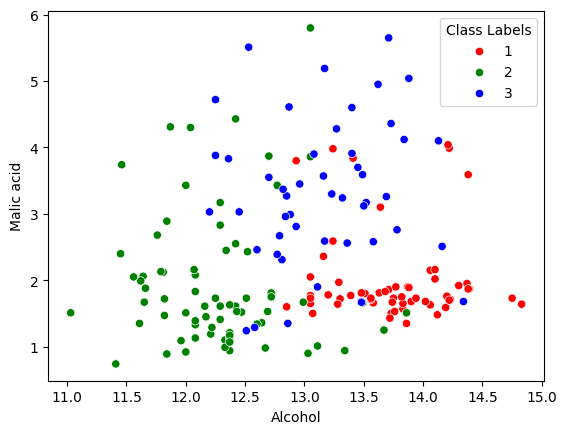

In [6]:
sns.scatterplot(x='Alcohol', y='Malic acid', data=df, hue='Class Labels', palette=['r','g','b'])

**Distributing the Training data and test data for testing and training model**

In [7]:
X = 3
df

,Class Labels,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (df.drop('Class Labels', axis=1), df['Class Labels'], test_size=0.3)

In [9]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

**Normalization using MinMaxScaler**

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [11]:
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
np.round(X_train_scaled.describe(), 2)

,Alcohol,Malic acid
count,124.00,124.00
mean,0.53,0.30
std,0.21,0.22
min,0.00,0.00
25%,0.35,0.16
50%,0.54,0.21
75%,0.71,0.44
max,1.00,1.00


# Comparsion of before scaling and after scaling

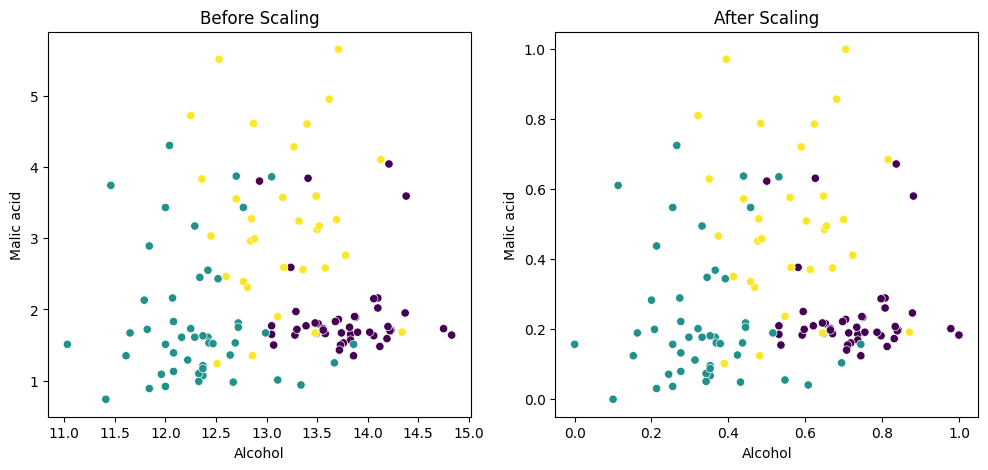

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Before Scaling')
sns.scatterplot(x='Alcohol', y='Malic acid', data=X_train, c=y_train, ax=ax1)


ax2.set_title('After Scaling')
sns.scatterplot(x='Alcohol', y='Malic acid', data=X_train_scaled, c=y_train, ax=ax2)

plt.show()

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

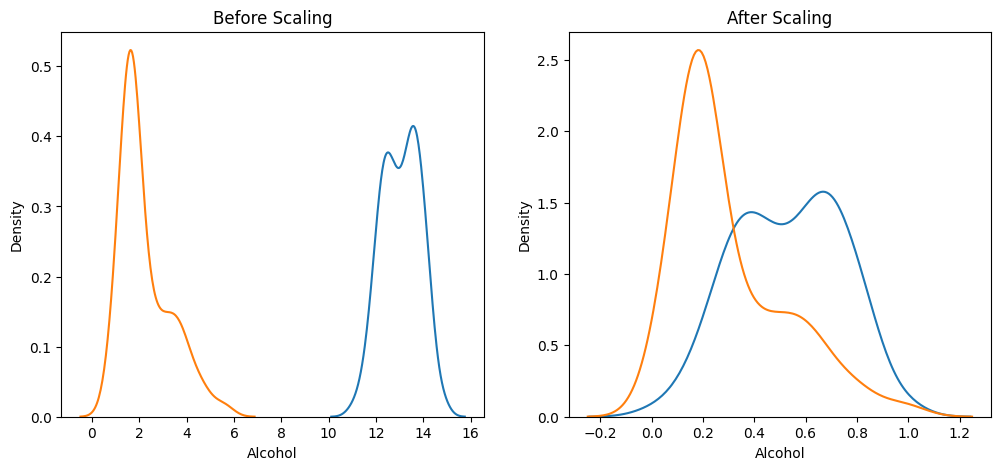

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(x='Alcohol', data=X_train_scaled, ax=ax2)
sns.kdeplot(x='Malic acid', data=X_train_scaled, ax=ax2)